# Deep Learning

## 1. Artificial Neural Networks
In this part we will see:
<ol>
    <li> how to build an ANN </li>
    <li> how to predict the outcome of a single observation </li>
    <li> how to evaluate the performance of an ANN with k-Fold Cross Validation </li>
    <li> how to tackle overfitting with Dropout </li>
    <li> how to do some Parameter Tuning on our ANN to improve its performance </li>
</ol>


The business problem that we are going to deal with is a classification problem. 
<br>Based on our information we are going to predict which customer is leaving or staying in the bank.</br>

In [4]:
# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
# Import Theano
import keras 

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

The "RowNumber", "CustomerId" and "Surname" are not determinant in our business problem. 
<br> So we will not consider them.</br>

In [5]:
dataset.iloc[:,3:13].head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [6]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
# Include our dependent variables into our matrix X of features 
X = dataset.iloc[:, 3:13].values
print (X.shape)
print (type(X))
X

(10000, 10)
<class 'numpy.ndarray'>


array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ..., 
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [9]:
# Vector y of dependent variables
y = dataset.iloc[:, 13].values
print(y.shape)
print(type(y))
y

(10000,)
<class 'numpy.ndarray'>


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [10]:
# Encoding our first categorical independent variable 
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
print(X)

[[619 0 'Female' ..., 1 1 101348.88]
 [608 2 'Female' ..., 0 1 112542.58]
 [502 0 'Female' ..., 1 0 113931.57]
 ..., 
 [709 0 'Female' ..., 0 1 42085.58]
 [772 1 'Male' ..., 1 0 92888.52]
 [792 0 'Female' ..., 1 0 38190.78]]


In [11]:
# Encoding our second categorical independent variable
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])
print(X)

[[619 0 0 ..., 1 1 101348.88]
 [608 2 0 ..., 0 1 112542.58]
 [502 0 0 ..., 1 0 113931.57]
 ..., 
 [709 0 0 ..., 0 1 42085.58]
 [772 1 1 ..., 1 0 92888.52]
 [792 0 0 ..., 1 0 38190.78]]


We can see that from the first categorical variable (Geography), France is 0, Spain is 2 and Germany is 1.
<br>From the second categorical variable (Gender), Female is 0 and Male is 1.</br>

In [12]:
# Create a dummy variable
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
np.set_printoptions(precision=3, suppress=True)
print(X)

[[      1.         0.         0.   ...,       1.         1.    101348.88]
 [      0.         0.         1.   ...,       0.         1.    112542.58]
 [      1.         0.         0.   ...,       1.         0.    113931.57]
 ..., 
 [      1.         0.         0.   ...,       0.         1.     42085.58]
 [      0.         1.         0.   ...,       1.         0.     92888.52]
 [      1.         0.         0.   ...,       1.         0.     38190.78]]


In [13]:
# Remove a dummy variable to avoid the dummy variable trap
X[0]
print(X.shape)
X = X[:, 1:]
np.set_printoptions(precision=3, suppress=True)
X[0]
print(X.shape)

(10000, 12)
(10000, 11)


So we have now only two dummy variables for the countries.

In [14]:
# Splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


The next step is about Feature Scaling. Because lots of computation are done so we need to do feature scaling.

In [15]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
np.set_printoptions(precision=3)
print(X_train)
print(X_train.shape)

[[-0.57   1.743  0.17  ...,  0.643 -1.032  1.106]
 [ 1.755 -0.574 -2.305 ...,  0.643  0.969 -0.749]
 [-0.57  -0.574 -1.191 ...,  0.643 -1.032  1.485]
 ..., 
 [-0.57  -0.574  0.902 ...,  0.643 -1.032  1.412]
 [-0.57   1.743 -0.624 ...,  0.643  0.969  0.844]
 [ 1.755 -0.574 -0.284 ...,  0.643 -1.032  0.325]]
(8000, 11)


In [16]:
np.set_printoptions(precision=3)
print(X_test)
print(X_test.shape)

[[ 1.755 -0.574 -0.552 ...,  0.643  0.969  1.611]
 [-0.57  -0.574 -1.315 ...,  0.643 -1.032  0.496]
 [-0.57   1.743  0.572 ...,  0.643  0.969 -0.425]
 ..., 
 [-0.57   1.743 -0.748 ...,  0.643 -1.032  0.719]
 [ 1.755 -0.574 -0.006 ...,  0.643  0.969 -1.545]
 [ 1.755 -0.574 -0.799 ...,  0.643 -1.032  1.613]]
(2000, 11)


Now we can make the ANN and importing the Keras library and packages

In [17]:
# Importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
# Initialising the ANN
classifier = Sequential()

Using the Stochastic Gradient Descent method we will apply the rectifier function for the hidden layers and the sigmoid function for the output layer.

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform", input_dim=11))

In [20]:
# Adding our second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [21]:
# Adding the final layer (the output layer)
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [22]:
# Compiling the ANN
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
# Fitting our ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 256us/step - loss: 0.4770 - acc: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.4282 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.4222 - acc: 0.7994
Epoch 4/100
8000/8000 [==============================] - 1s 167us/step - loss: 0.4184 - acc: 0.8241
Epoch 5/100
8000/8000 [==============================] - 1s 187us/step - loss: 0.4156 - acc: 0.8292
Epoch 6/100
8000/8000 [==============================] - 1s 169us/step - loss: 0.4140 - acc: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.4126 - acc: 0.8309
Epoch 8/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.4113 - acc: 0.8324
Epoch 9/100
8000/8000 [==============================] - 1s 167us/step - loss: 0.4105 - acc: 0.8346
Epoch 10/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.4095 - acc: 0.8334

In [25]:
# Predicting the test results 
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=3)
y_pred

array([[ 0.201],
       [ 0.298],
       [ 0.16 ],
       ..., 
       [ 0.202],
       [ 0.111],
       [ 0.154]], dtype=float32)

These are the probabilities that the customer, in respect with the index, leave the bank.
<br> For example the customer with index 0 has 20% to leave the bank.</br>

In [26]:
# Now using a threshold, not probabilities
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

This means if y_pred > 0.5 it returns "True" if not it returns "False".

Making a prediction for single new observation
<br>Predict if the customer with the following informations will leave the bank or not:</br>
<ul>
    <li>Geography: France</li>
    <li>Credit Score: 600</li>
    <li>Gender: Male</li>
    <li>Age: 40</li>
    <li>Tenure: 3</li>
    <li>Balance: 60000</li>
    <li>Number of Products: 2</li>
    <li>Has a credit Card: Yes</li>
    <li>Is a Active Member: Yes</li>
    <li>Estimated Salary: 50000</li>
<ul>

In [27]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]], dtype=bool)

In conclusion this customer will not leave the bank.

In [28]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1551,   44],
       [ 271,  134]], dtype=int64)

We have (1551 + 134) correct predictions and (271 + 44) incorrect predictions.
<br> (1551 + 134) / 2000 ( total number of observations in our test set) gives us 84,25% of correct predictions.</br>
<br> That is close to the % obtained when fitting our ANN to the training set.</br>

By Training our model in the train set and the test several times we usually get different accuracies.
<br> This is because of the Bias-Variance Tradeoff.</br>
<br> We can fix this by using the KFold-Cross-Validation method.</br>

<br> For parallel computing, " n_jobs = -1 " for multi CPU. </br>
<br> n_jobs=1 => 1 CPU core.</br>
<br> Currently, multi CPU core processing is not supported with my configuration.</br>

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# The above classifier created is only a local classifier, so we need to create a global classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=100)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=1)

In [28]:
accuracies

array([ 0.841,  0.841,  0.831,  0.829,  0.857,  0.862,  0.835,  0.861,
        0.841,  0.842])

In [29]:
# Mean of "accuracies"
print(accuracies.mean())
# Variance of "accuracies"
print(accuracies.std())

0.844249994978
0.0114999999932


Low variance and 84% accuracy.

In [ ]:
# Improving our ANN
# Parameters tuning with GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size':[25,32], 'epochs':[100,500], 'optimizer':['adam','rmsprop']}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

## 2. Convolutional Neural Network
In this section we will see:
<ol>
    <li> Convolution Operation </li>
    <li> ReLU Layer </li>
    <li> Pooling </li> 
    <li> Flattening </li>
    <li> Full Connection </li>
</ol>

We are going to use the Convolutional Neural (CNN) Network method to solve an image classification problem where our goal will be to classify an image and to predict which class it belongs.
<br> Our dataset consists of 10,000 images of cats and dogs. </br>
<br> The splitting was about 80%-20%. </br>

In [31]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [32]:
# Initializing the CNN
classifier = Sequential()

In [33]:
# Adding the first hidden layer
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

In [34]:
# Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

By pooling we reduce the complexity of our model without reducing its performance.

In [35]:
# Flattening
classifier.add(Flatten())

In [36]:
# Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [37]:
# Compliling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We will use the 'image augmentation' method. 
<br> It allows us to create many batches of our images and then for each batch it will apply random transformations on a random selection of our images.</br>


In [38]:
# Import the ImageDataGenerator 
from keras.preprocessing.image import ImageDataGenerator

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [43]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# Fitting our CNN
classifier.fit_generator(training_set,
                         steps_per_epoch=8000,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=2000)

After running the above code we obtained an accuracy of 84% on the train set and 75% on the test set.
<br> We can reduce that difference between the training set result and the test set result by adding a second convolutional layer. </br>

In [53]:
# Making new predictions
# But before going further let us see which index corresponds to a cat or a dog in our training_set file
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [59]:
# Using the same method to find out a prediction in the second file of images
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64,64)) # Loading the file of images
test_image = image.img_to_array(test_image)    
test_image = np.expand_dims(test_image, axis=0) # 'expand' method to correspond to the batch otherwise there will be an error
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1 :
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'

## 3. Recurrent Neural Network
In this part we will:
<ol>
    <li> Start building a simple RNN, our first attempt. </li>
    <li> Observe the results to identify possible issues and ways of improvement. </li>
    <li> Learn how to to evaluate a RNN model, and more generally a Regression model. </li>
    <li> Identify the issues and improvements solutions to make several more robust and relevant RNNs. </li>
</ol>

We are going to predict the stock price of Google.
<br> As it is not possible to predict exactly the future stock price, but it is actually possible to predict some trends.</br>
<br> So we are going to predict the upward and downward trends that exist in the Google stock price.</br>
<br> We are going to train our model on the open Google stock price from the beginning of 2012 to the end of 2016, and try to predict trends in January 2017. </br>

In [5]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.head())
print(dataset_train.shape)
print(training_set)
print(training_set.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)
[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]
(1258, 1)


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
print(training_set_scaled.shape)

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]
(1258, 1)


In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)
print(X_train.shape)
print(y_train.shape)

[[ 0.08581368  0.09701243  0.09433366 ...,  0.07846566  0.08034452
   0.08497656]
 [ 0.09701243  0.09433366  0.09156187 ...,  0.08034452  0.08497656
   0.08627874]
 [ 0.09433366  0.09156187  0.07984225 ...,  0.08497656  0.08627874
   0.08471612]
 ..., 
 [ 0.92106928  0.92438053  0.93048218 ...,  0.95475854  0.95204256
   0.95163331]
 [ 0.92438053  0.93048218  0.9299055  ...,  0.95204256  0.95163331
   0.95725128]
 [ 0.93048218  0.9299055   0.93113327 ...,  0.95163331  0.95725128
   0.93796041]]
[ 0.08627874  0.08471612  0.07454052 ...,  0.95725128  0.93796041
  0.93688146]
(1198, 60)
(1198,)


In [8]:
# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # getting 3 dimensions
print(X_train)
print(X_train.shape)

[[[ 0.08581368]
  [ 0.09701243]
  [ 0.09433366]
  ..., 
  [ 0.07846566]
  [ 0.08034452]
  [ 0.08497656]]

 [[ 0.09701243]
  [ 0.09433366]
  [ 0.09156187]
  ..., 
  [ 0.08034452]
  [ 0.08497656]
  [ 0.08627874]]

 [[ 0.09433366]
  [ 0.09156187]
  [ 0.07984225]
  ..., 
  [ 0.08497656]
  [ 0.08627874]
  [ 0.08471612]]

 ..., 
 [[ 0.92106928]
  [ 0.92438053]
  [ 0.93048218]
  ..., 
  [ 0.95475854]
  [ 0.95204256]
  [ 0.95163331]]

 [[ 0.92438053]
  [ 0.93048218]
  [ 0.9299055 ]
  ..., 
  [ 0.95204256]
  [ 0.95163331]
  [ 0.95725128]]

 [[ 0.93048218]
  [ 0.9299055 ]
  [ 0.93113327]
  ..., 
  [ 0.95163331]
  [ 0.95725128]
  [ 0.93796041]]]
(1198, 60, 1)


In [9]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation to avoid overfitting
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # Making a stacked LSTM layer
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Droptout regularisation
regressor.add(LSTM(units=50, return_sequences=True)) 
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Droptout regularisation
regressor.add(LSTM(units=50, return_sequences=True)) 
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Droptout regularisation
regressor.add(LSTM(units=50)) # The return_sequences parameter is set to be False as we are not adding any more layer 
regressor.add(Dropout(0.2))

In [10]:
# Adding the output layer
regressor.add(Dense(units=1))

In [11]:
# Compiling the RNN 
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Fitting the RNN to the traning set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0387
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - 

1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014


We can see that the loss is converging around 0.0015.

In [13]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(dataset_test.head())
print(dataset_test.shape)
print(real_stock_price)
print(real_stock_price.shape)

       Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400
(20, 6)
[[ 778.81]
 [ 788.36]
 [ 786.08]
 [ 795.26]
 [ 806.4 ]
 [ 807.86]
 [ 805.  ]
 [ 807.14]
 [ 807.48]
 [ 807.08]
 [ 805.81]
 [ 805.12]
 [ 806.91]
 [ 807.25]
 [ 822.3 ]
 [ 829.62]
 [ 837.81]
 [ 834.71]
 [ 814.66]
 [ 796.86]]
(20, 1)


In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) # we concatenate the 2 dataframes by adding their lines
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(dataset_total)
print(dataset_total.shape)
print(inputs)
print(inputs.shape)

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64
(1278,)
[[ 0.9299055 ]
 [ 0.93113327]
 [ 0.9

In [24]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(X_test)
print(X_test.shape)
print(predicted_stock_price)
print(predicted_stock_price.shape)

[[[ 0.9299055 ]
  [ 0.93113327]
  [ 0.92750577]
  ..., 
  [ 0.95725128]
  [ 0.93796041]
  [ 0.93688146]]

 [[ 0.93113327]
  [ 0.92750577]
  [ 0.94415507]
  ..., 
  [ 0.93796041]
  [ 0.93688146]
  [ 0.92955205]]

 [[ 0.92750577]
  [ 0.94415507]
  [ 0.93876032]
  ..., 
  [ 0.93688146]
  [ 0.92955205]
  [ 0.94731751]]

 ..., 
 [[ 0.96054394]
  [ 0.9371419 ]
  [ 0.92841729]
  ..., 
  [ 1.01045465]
  [ 1.02407173]
  [ 1.03930724]]

 [[ 0.9371419 ]
  [ 0.92841729]
  [ 0.90804747]
  ..., 
  [ 1.02407173]
  [ 1.03930724]
  [ 1.03354044]]

 [[ 0.92841729]
  [ 0.90804747]
  [ 0.8771858 ]
  ..., 
  [ 1.03930724]
  [ 1.03354044]
  [ 0.99624228]]]
(20, 60, 1)
[[ 793.93713379]
 [ 791.24395752]
 [ 790.61590576]
 [ 791.48120117]
 [ 794.46252441]
 [ 800.12524414]
 [ 806.24719238]
 [ 810.03894043]
 [ 811.51586914]
 [ 811.56115723]
 [ 811.01635742]
 [ 810.29772949]
 [ 809.70227051]
 [ 809.81488037]
 [ 810.56610107]
 [ 814.42138672]
 [ 821.04486084]
 [ 829.03692627]
 [ 834.84307861]
 [ 833.47949219]]
(20,

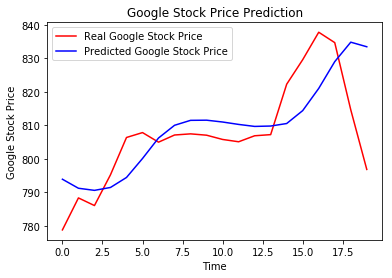

In [26]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

We can see our predictions could follow some trends, such as some ups and downs.
<br>Which means that our model is follwing quite well the directions of the stock price.</br>